In [1]:
#Libraries Imported 
import numpy as np
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow

In [2]:
#import image

#Bad Image Importation 
bad1 = cv2.imread("/content/drive/MyDrive/EE610-Assignments/Bad1.jpg",0) #contrast
bad2 = cv2.imread("/content/drive/MyDrive/EE610-Assignments/Bad2.jpg",0) #contrast
bad3 = cv2.imread("/content/drive/MyDrive/EE610-Assignments/Bad3.jpg",0) #Motion Blur
bad4 = cv2.imread("/content/drive/MyDrive/EE610-Assignments/Bad4.jpg",0) #Motion Blur

#Good Image Importation
good1 = cv2.imread("/content/drive/MyDrive/EE610-Assignments/Good1.jpg",0)
good2 = cv2.imread("/content/drive/MyDrive/EE610-Assignments/Good2.jpg",0)
good3 = cv2.imread("/content/drive/MyDrive/EE610-Assignments/Good3.jpg",0)
good4 = cv2.imread("/content/drive/MyDrive/EE610-Assignments/Good4.jpg",0)
good5 = cv2.imread("/content/drive/MyDrive/EE610-Assignments/Good5.jpg",0)
good6 = cv2.imread("/content/drive/MyDrive/EE610-Assignments/Good6.jpg",0)


In [3]:
main = [good1,good2,good3,good4,good5,good6]

temp = []
#resizing Images 
for i in range(6):
    temp.append(cv2.resize(main[i],(1000,1000)))
    # cv2_imshow(temp[i])


#Deviding into training and validation set
good_train = temp[0:4].copy()
good_valid = temp[4:].copy()

In [4]:
!pip install imagedegrade       

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
#imported pre-defined imagedegrade library and using that introduces noise to the images

import random
from imagedegrade import np as degrade     #credit : https://github.com/mastnk/imagedegrade
from scipy.ndimage import gaussian_filter
#degrad_options = ["blur", "noise", "saltpaper"]

degrad_goodt = [] #creating new array of degraded_good images 
random.seed(0)
for i in range(4):
    k = random.randint(0,2)  #Ideas here is making random number between 0 to 2 and acc to that adding noice to the images
    if k == 0:  #gaussian noise
      degrad_goodt.append(gaussian_filter(good_train[i], sigma=[3,3], truncate=3.0, mode='nearest' ))
    if k == 1:  #noise function 
      degrad_goodt.append(degrade.noise(good_train[i],10))
    if k == 2:  #saltpepper noise
      degrad_goodt.append(degrade.saltpepper(good_train[i] , 0.1, intensity_range = (0,1) ))

    
degrad_goodv = []  #creating new array of degraded_good images

for i in range(2):
    k = random.randint(0,1)
    if k == 0: #gaussian noise
      degrad_goodv.append(gaussian_filter(good_valid[i], sigma=[3,3], truncate=3.0, mode='nearest' )) 
    if k == 1: #saltpepper noise
      degrad_goodv.append(degrade.saltpepper(good_valid[i] , 0.1, intensity_range = (0,1) ))     

good_degrad = degrad_goodt + degrad_goodv  # adding both training and testing set and making 1 set of images

In [7]:
#showing degraded images of training set

for i in range(4):
   cv2_imshow(degrad_goodt[i])

Output hidden; open in https://colab.research.google.com to view.

In [8]:
#creating training data
X=[]    #It will store Flattened form of degraded image patches
y=[]    #It will store coresponding good image patch centre
for x in range(len(temp)-2):
  for sample in range(750):
 
    i = random.randint(2, len(good_degrad[x])-3)            #choosing random coordinate in x direction of image       
    j = random.randint(2, len(good_degrad[x][0])-3)         #choosing random coordinate in y direction of image  

    X.append(good_degrad[x][i-2:i+3,j-2:j+3].flatten())     #taking random paches from the degraded good image and flattening it, and mapping to 
    y.append(temp[x][i][j])                                 #its coresponding good image patch centre

#credit : kaishva Chetan Shah 

In [9]:
#Model Creation
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

#Gridsearch algoridhm to find optimised parameter value
param_grid = {'C': [100,10,1,0.1,0.01], 'gamma': [100,10,1,0.1,0.01],'epsilon':[100,10,1,0.1,0.01]}   #parameter list to be optimised

#we are selecting SVR model to make enhanced image from degraded image
param = GridSearchCV(SVR(),param_grid,refit=True,verbose=2)   #Given param_grid to be optimised in the SVR model

In [10]:
param.fit(X,y)     #Fitting Traing data to the model created

Fitting 5 folds for each of 125 candidates, totalling 625 fits
[CV] END ......................C=100, epsilon=100, gamma=100; total time=   0.1s
[CV] END ......................C=100, epsilon=100, gamma=100; total time=   0.1s
[CV] END ......................C=100, epsilon=100, gamma=100; total time=   0.1s
[CV] END ......................C=100, epsilon=100, gamma=100; total time=   0.1s
[CV] END ......................C=100, epsilon=100, gamma=100; total time=   0.1s
[CV] END .......................C=100, epsilon=100, gamma=10; total time=   0.1s
[CV] END .......................C=100, epsilon=100, gamma=10; total time=   0.1s
[CV] END .......................C=100, epsilon=100, gamma=10; total time=   0.1s
[CV] END .......................C=100, epsilon=100, gamma=10; total time=   0.1s
[CV] END .......................C=100, epsilon=100, gamma=10; total time=   0.1s
[CV] END ........................C=100, epsilon=100, gamma=1; total time=   0.1s
[CV] END ........................C=100, epsilo

GridSearchCV(estimator=SVR(),
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'epsilon': [100, 10, 1, 0.1, 0.01],
                         'gamma': [100, 10, 1, 0.1, 0.01]},
             verbose=2)

In [11]:
print(param.best_estimator_)  #best parameter combination

SVR(C=100, epsilon=1, gamma=0.01)


Prediction using param model

In [14]:
#testing validation set to check model accuracy and result

#the whole method to make validation set is same as Making Training
X_val=[]     
y_val=[]


for x in range(2):
  # for sample in range(750):
   for i in range(2,len(degrad_goodv[x])-3) :   #Taking x cordinate of image from validation set of degraded good image
      for j in range(2,len(degrad_goodv[x][0])-3):   #Taking y cordinate of image from validation set of degraded good image

          X_val.append(degrad_goodv[x][i-2:i+3,j-2:j+3].flatten())   #taking random 5*5 paches from the degraded good image and flattening it, and mapping to 
          y_val.append(temp[4+x][i][j])                              #its coresponding good image patch centre


y_pred = param.predict(X_val)

In [17]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val,y_pred)     #mean squarred error

3844.8721681764487

Testing Our model on validation set, by showing resulting Image

In [21]:
#Testing our model on validation set image to show

z = temp[4].copy()   # making copy of an image, pixel values of z will be replaced by the predicted value of model
#temp 4 is just taken as a array with some value we have to replace all values of it with z
x = temp[4].shape[0]   #x dir length
y = temp[4].shape[1]   #y dir length

for i in range(2,x-3):
  for j in range(2,y-3):
    #degrade_goodv[0] is first image from validation set, we are going to try our model on that by showing the output image
    x_val = degrad_goodv[0][i-2:i+3,j-2:j+3].flatten()  #idea here is loop takes all the paches of size 5*5 and giving to the model to predict 
    z[i][j] = param.predict([x_val])                    #good image pixel from that.....the mapping will be like 5*5--> 1, and then the predicted good image pixel will be replaced
                                                        #in the z image array


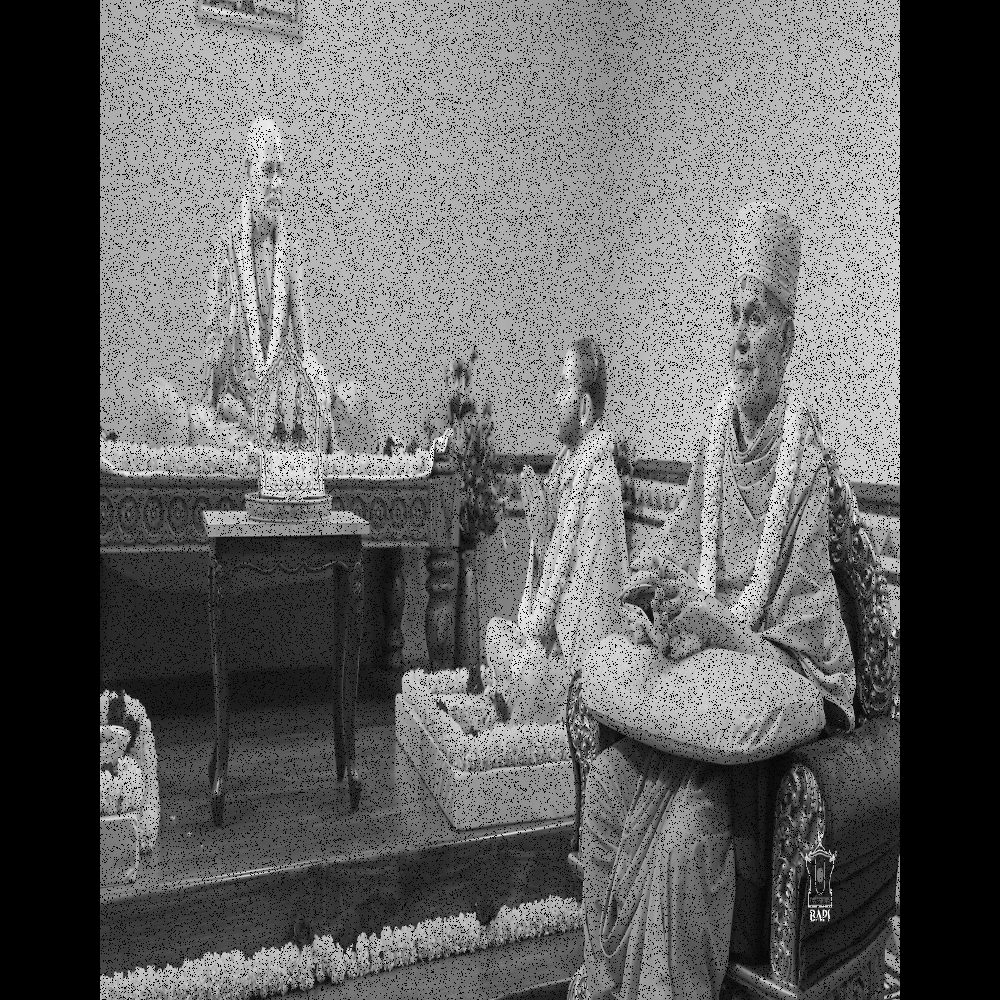

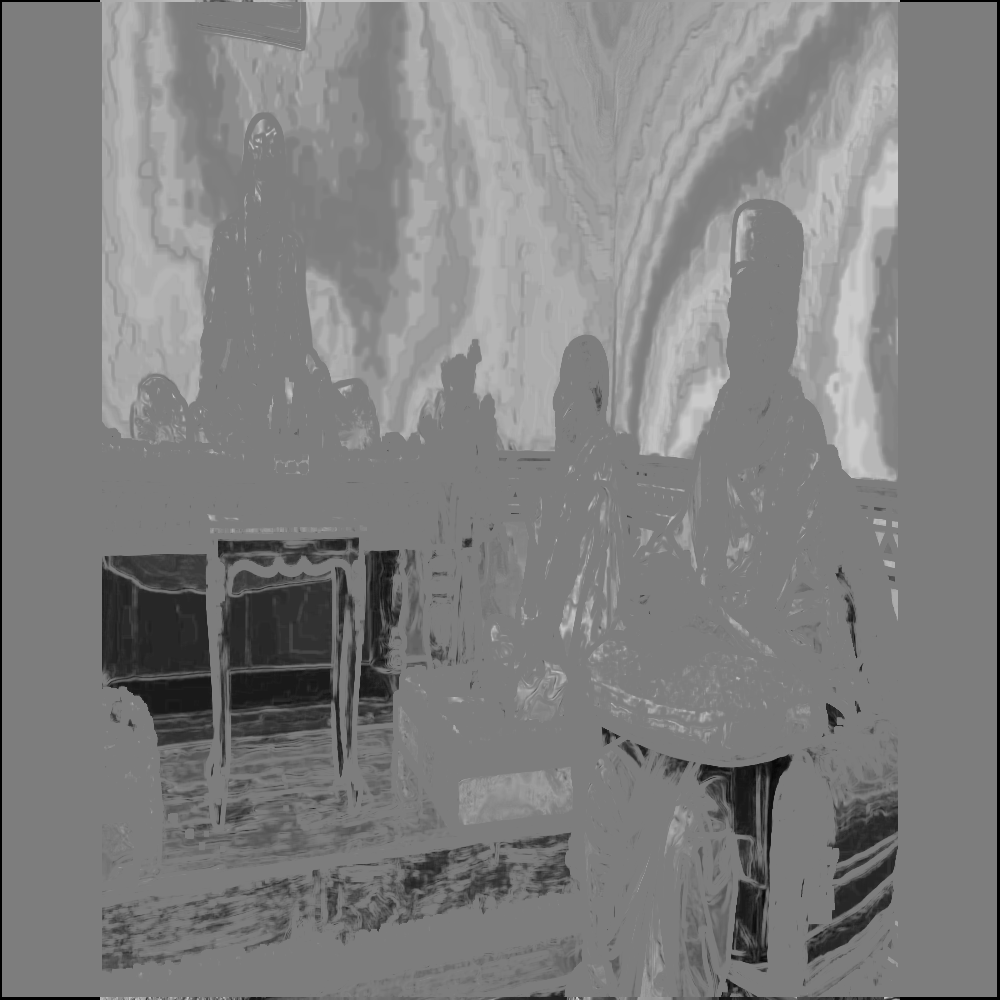

In [28]:
cv2_imshow(degrad_goodv[0])  #degraded validation set image
cv2_imshow(z)      #predicted good image

Source: 
*   https://scikit-image.org/
*   https://www.geeksforgeeks.org/
*   https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html
*   https://scikit-learn.org/






